# Dataset preprocessing and learning curves
* Objectives:
 * Observe impact of dataset normalization
 * Use learning curves to tune hyperparameters 

## First things first
* Spend 3-5 minutes [here](https://lossfunctions.tumblr.com/)
* Share your favorite!

## Teams
* Team 1: Mathieu-Savvas Dimitriades, Jonathan Palafoutas, Miles Simpkins, Sneha Ramshanker
* Team 2: Victor Geadah, Elie Svoll, Promise Ekpo, May Mei, Arthur Yang
* Team 3: Manuel Kreutle, Felix O'Mahony, Daniel Melesse, Navreeta Singh
* Team 4: Rafael Pastrana Jimenez, Jose Ayala Garcia, An-Ya Olson, Kathryn Wantlin, Emre Onal
* Team 5: Xiaohan Li, Sarah Witzman, Karla Soto Cuevas, Sophie Chen, Liam Parker

## SUBMISSIONS
* Please save a copy of your lab, adding a cell with all first and last names of your group members, and upload one submission of your group's work to [this folder](https://drive.google.com/drive/folders/17kQRtbVXbe6SL4Pmbe87BETs8EEYUXjk)

## Dataset preprocessing
### Without normalization (sort of)
* Here you'll train an MLP on the MNIST dataset without normalizing from training set statistics. 
* The datset is transformed to a Tensor with values between zero and one. 

In [ ]:
!pip install torch

import torch
import torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Question 1: What is the default weight initialization?
# YOUR ANSWER HERE

class MLP(torch.nn.Module):
  def __init__(self, indim=784, outdim=10, hdim=100):
    super(MLP, self).__init__()
    # build an mlp with two hidden layers
    hidden1 = torch.nn.Linear(indim, hdim)
    hidden2 = torch.nn.Linear(hdim, hdim)
    output = torch.nn.Linear(hdim, outdim)
    self.indim = indim
    self.model = torch.nn.Sequential(hidden1, torch.nn.ReLU(), hidden2, torch.nn.ReLU(), output)
    
  def forward(self, x):
    return self.model(x.reshape(-1, self.indim))

In [ ]:
def compute_accuracy(net, dataloader):
  # don't update the weights
  with torch.no_grad():
      correct = 0
      total = 0
      for batch in dataloader:
            images, labels = batch
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
  return 100 * correct/total

In [ ]:
def train_eval_loop(optimizer, trainloader, testloader, mlp, loss_function, num_epochs):

  training_loss = []
  test_accuracy = []
  train_accuracy = []

  # training loop
  for i in range(num_epochs):
    for idx, batch in enumerate(trainloader):
      data, label = batch
      prediction = mlp(data)
      loss = loss_function(prediction, label)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if idx % save_every == 0:
        training_loss.append(loss.item())

    if i % test_every == 0:
        test_accuracy.append(compute_accuracy(mlp, testloader))
        train_accuracy.append(compute_accuracy(mlp, trainloader))

  return training_loss, test_accuracy, train_accuracy

In [ ]:
root_dir = './'

# hyperparameters
num_epochs = 10
lr = 1e-1
batch_size = 32
num_classes = 10
save_every = 100
test_every = 2

In [ ]:
import torchvision.transforms as transforms

# get the dataset
traindata = torchvision.datasets.MNIST(root=root_dir, train=True, download=True)
# testset = torchvision.datasets.MNIST(root=root_dir, train=False, download=True)

# Instead of testing on the testset, we'll train and test on the subsets of the training set
# https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split

# Question 2: What type is an element of the trainset
# Start with type(traindata[0]) but go deeper
# YOUR ANSWER HERE

# Question 3: How many examples are in the training set
# YOUR ANSWER HERE
num_examples = 60000
num_train = 40000
num_val = 20000

trainset, testset = torch.utils.data.random_split(traindata, [num_train, num_val], generator=torch.Generator().manual_seed(42))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
import numpy as np

# transform data to a tensor and build dataloader 
transform = transforms.Compose([ transforms.Lambda(lambda img: torch.Tensor(np.array(img))) ])

trainset.dataset.transform = transform
testset.dataset.transform = transform

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

In [ ]:
# model, optimizer, and loss function
mlp = MLP()
optimizer = torch.optim.Adam(mlp.parameters())
loss_function = torch.nn.CrossEntropyLoss()

unnormalized_training_loss, unnormalized_test_accuracy, unnormalized_train_accuracy = train_eval_loop(optimizer, trainloader, testloader, mlp, loss_function, num_epochs)

Text(0.5, 0, 'epoch / 2')

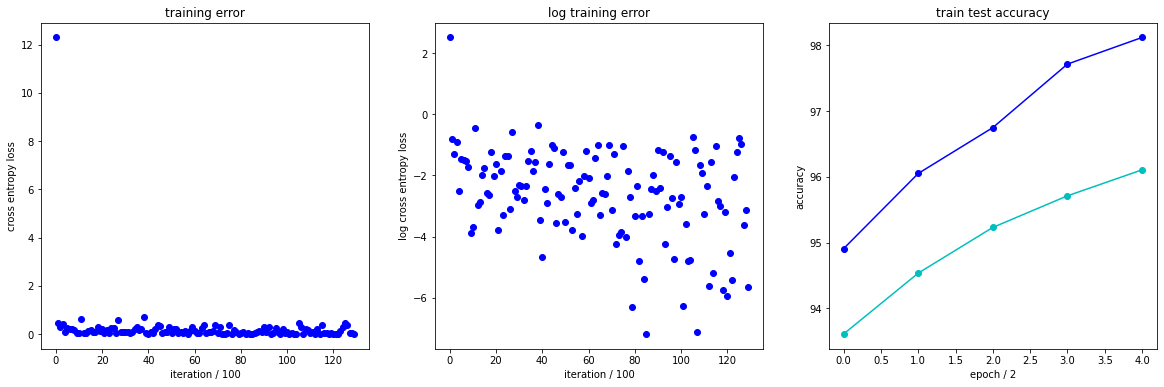

In [ ]:
import matplotlib.pylab as plt

unnormalized_training_loss_array = np.array(unnormalized_training_loss)

plt.figure(figsize=[20, 6])
plt.subplot(131)
plt.plot(unnormalized_training_loss_array, 'bo')
plt.title('training error')
plt.ylabel('cross entropy loss')
plt.xlabel('iteration / {}'.format(save_every))

plt.subplot(132)
plt.plot(np.log(unnormalized_training_loss_array), 'bo')
plt.title('log training error')
plt.ylabel('log cross entropy loss')
plt.xlabel('iteration / {}'.format(save_every))

plt.subplot(133)
plt.plot(unnormalized_test_accuracy, '-co')
plt.plot(unnormalized_train_accuracy, '-bo')
plt.title('train test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch / {}'.format(test_every))

# Comparing training and validation accuracy can give a sense of the generalization power of the network
# https://cs231n.github.io/neural-networks-3/#accuracy
# Question 4: Has training converged (justify your response)? If not, what could help?
# YOUR ANSWER HERE

### With normalization
* [Here](https://cs231n.github.io/neural-networks-2/#datapre) are some notes on dataset preprocessing including: normalization, PCA, and whitening. Although the last two are rarely used in deep learning its still nice to know what they are and why they might be.
* Before training, compute the statistics of the __training set__ and use those numbers to normalize both the training and testing set

In [ ]:
images = np.asarray([ np.array(trainset.dataset[i][0]) for i in range(num_examples) ], dtype=np.float64) # num_examples x height x width

In [ ]:
# Some additional information on preprocessing data is provided in scikit-learn
# https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

# In this lab you'll do per channel mean subtraction and scaling
# as noted in https://cs231n.github.io/neural-networks-2/#datapre
# this approach is fine for images since each pixel isn't usually considered a different kind of feature

# compute image statistics
# mean over the 60000 images for each pixel 
image_mean = np.mean(images)
mean_centered_images = images - np.mean(images)
image_std = np.std(images)
normalized_images = (images - np.mean(images)) / np.std(images)

print('The mean of the images in the dataset is {image_mean}, with shape {image_mean_shape}'.format(image_mean=image_mean, image_mean_shape=image_mean.shape)) # scalar valued
print('The std of the mean centered images is {image_std}, with shape {image_std_shape}'.format(image_std=image_std, image_std_shape=image_std.shape)) # scalar valued
print('Sanity Check: The mean of the mean centered images is {mean_centered_images_mean}'.format(mean_centered_images_mean=np.mean(mean_centered_images)))
print('Sanity Check: The mean centered images have shape {mean_centered_images_mean_shape}'.format(mean_centered_images_mean_shape=mean_centered_images.shape))
print('Sanity Check: The mean of the normalized images is {normalized_images_mean}'.format(normalized_images_mean=np.mean(normalized_images)))
print('Sanity Check: The std of the normalized images is {normalized_images_std}'.format(normalized_images_std=np.std(normalized_images)))
print('Sanity Check: The shape of the normalized images is {normalized_images_shape}'.format(normalized_images_shape=normalized_images.shape)) # num_examples x height x width

The mean of the images in the dataset is 33.318421449829934, with shape ()
The std of the mean centered images is 78.56748998339798, with shape ()
Sanity Check: The mean of the mean centered images is 9.893771063189535e-15
Sanity Check: The mean centered images have shape (60000, 28, 28)
Sanity Check: The mean of the normalized images is -3.064638490070051e-17
Sanity Check: The std of the normalized images is 0.9999999999999998
Sanity Check: The shape of the normalized images is (60000, 28, 28)


In [ ]:
# Write the lambda function to normalize images
transform=transforms.Compose([
        transforms.Lambda(lambda img: torch.Tensor((np.array(img) - np.mean(np.array(img))) / np.std(np.array(img))))
        ])

trainset.dataset.transform = transform
testset.dataset.transform = transform

# build dataloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

In [ ]:
# model, optimizer, and loss function
mlp = MLP()
optimizer = torch.optim.Adam(mlp.parameters())
loss_function = torch.nn.CrossEntropyLoss()

normalized_training_loss, normalized_test_accuracy, normalized_train_accuracy = train_eval_loop(optimizer, trainloader, testloader, mlp, loss_function, num_epochs)

Text(0.5, 0, 'epoch / 2')

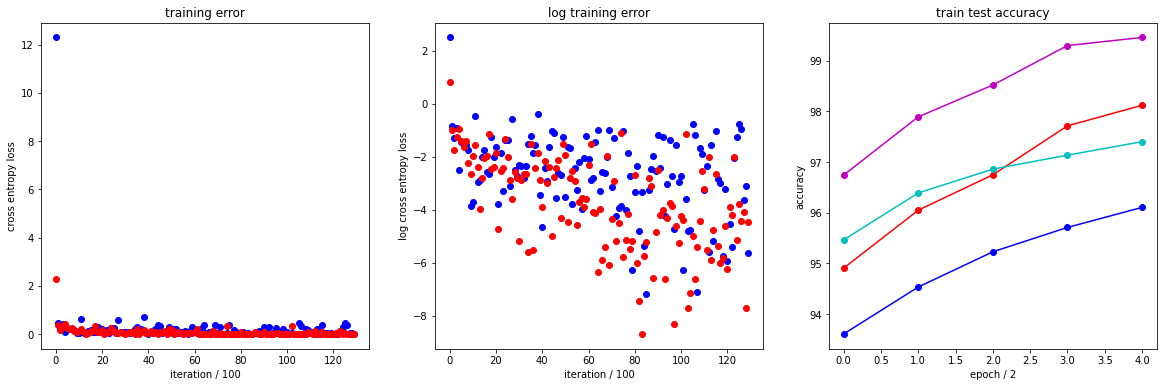

In [ ]:
normalized_training_loss_array = np.array(normalized_training_loss)

plt.figure(figsize=[20, 6])
plt.subplot(131)
plt.plot(unnormalized_training_loss_array, 'bo')
plt.plot(normalized_training_loss_array, 'ro')
plt.title('training error')
plt.ylabel('cross entropy loss')
plt.xlabel('iteration / {}'.format(save_every))

plt.subplot(132)
plt.plot(np.log(unnormalized_training_loss_array), 'bo')
plt.plot(np.log(normalized_training_loss_array), 'ro')
plt.title('log training error')
plt.ylabel('log cross entropy loss')
plt.xlabel('iteration / {}'.format(save_every))

plt.subplot(133)
plt.plot(unnormalized_test_accuracy, '-bo')
plt.plot(unnormalized_train_accuracy, '-ro')
plt.plot(normalized_test_accuracy, '-co')
plt.plot(normalized_train_accuracy, '-mo')
plt.title('train test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch / {}'.format(test_every))

# Question 5: Why could normalizing (or standardizing) the data improve training?
# http://www.faqs.org/faqs/ai-faq/neural-nets/part2/
# YOUR ANSWER HERE Normalizing controls the spread of the data so it standardizes the training input. The similarity of the training data makes it easier to train. 